<a href="https://colab.research.google.com/github/saniyanaaz/pthon.DA/blob/main/fakeInstagramProfilePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK#1 Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

TASK#2 loading the dataset

In [ ]:
# loading the training dataset
insta_df_train= pd.read_csv('train[1].csv')
insta_df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
insta_df_test=pd.read_csv('test[1].csv')
insta_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


## Task #3: PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
print(insta_df_train.tail(5))

     profile pic  nums/length username  fullname words  nums/length fullname  \
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     name==username  description length  external URL  private  #posts  \
571               0                   0             0        0      33   
572               0                  21             0        0      44   
573               0                   0             0        0       4   
574               0                  11             0        0       0   
575               0                   0             0        0       2   

     #followers  #follows  fake  
571         166       596     1  
572   

In [ ]:
print(insta_df_train.head(5))

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740       533     0  
2 

In [ ]:
# statistical summary of the dataframe
insta_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
insta_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
insta_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [ ]:
insta_df_train['fake'].value_counts()

0    288
1    288
Name: fake, dtype: int64

In [ ]:
insta_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
insta_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [ ]:
insta_df_test['profile pic'].value_counts()

1    91
0    29
Name: profile pic, dtype: int64

In [ ]:
insta_df_test['fake'].value_counts()

0    60
1    60
Name: fake, dtype: int64

# task#4 DATA VISUALIZATION

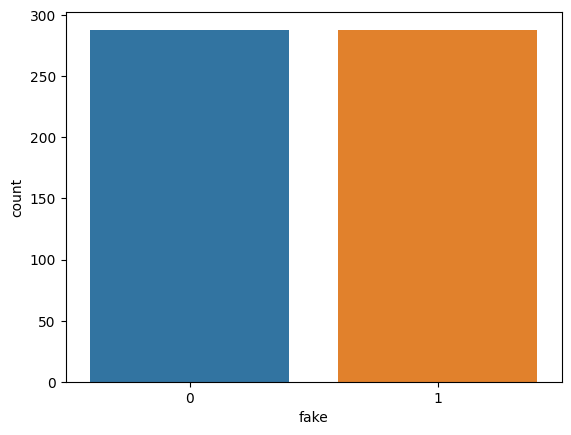

In [ ]:
sns.countplot(data=insta_df_train, x='fake')

plt.show()
# 0 represents fake(0 represents the negative class)
# 1 represents genuine(1 represents the positive class)


<Axes: xlabel='profile pic', ylabel='count'>

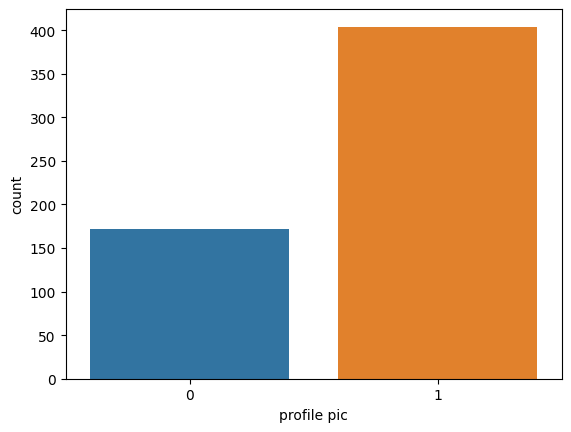

In [ ]:
sns.countplot(insta_df_train,x = 'profile pic')

<Axes: xlabel='private', ylabel='count'>

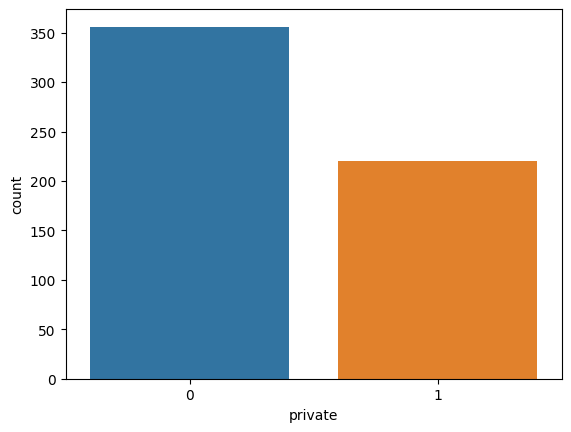

In [ ]:

sns.countplot(data=insta_df_train, x='private')




TASK#5 PREPARE THE DATA TO FEED THE MODEL

In [ ]:
#Separate features (X) and labels(Y)
X = insta_df_train.drop('fake',axis = 1) #features
y = insta_df_train['fake']    #label

In [ ]:
X

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [ ]:
#split the data into training and test sets
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
#create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
# calculating the evaluation metrics
accuracy = accuracy_score(y_test,prediction)
precision = precision_score(y_test,prediction)
recall = recall_score(y_test,prediction)
f1 = f1_score(y_test,prediction)



In [ ]:
print("accuracy is : ",accuracy)
print("precision is : ",precision)
print("recall is : ",recall)
print("f1score is : ",f1)

accuracy is :  0.9051724137931034
precision is :  0.92
recall is :  0.8679245283018868
f1score is :  0.8932038834951457


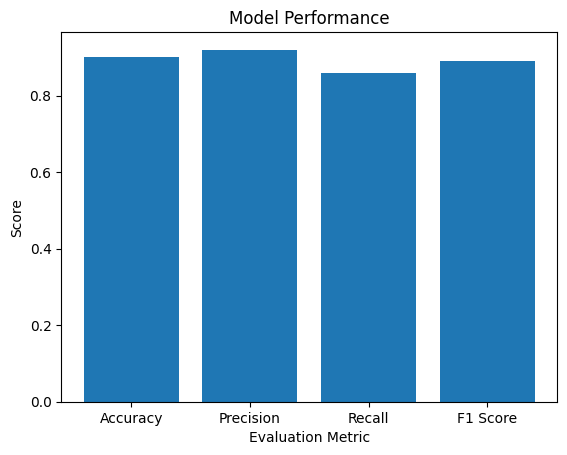

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [0.90, 0.92, 0.86, 0.89]

# Create a bar plot
plt.bar(metrics, scores)

# Add labels and title
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Model Performance')

# Display the plot
plt.show()


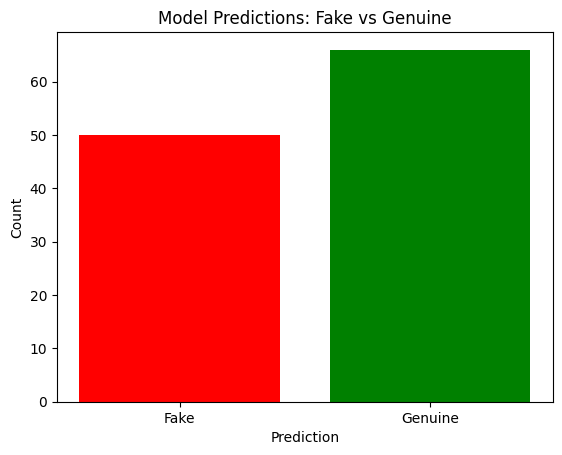

In [ ]:
# Count the number of predicted fake and genuine instances
fake_count = sum(prediction == 1)
genuine_count = sum(prediction == 0)

# Create a bar plot
labels = ['Fake', 'Genuine']
counts = [fake_count, genuine_count]
colors = ['red', 'green']

plt.bar(labels, counts, color=colors)

# Add labels and title
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Model Predictions: Fake vs Genuine')

# Display the plot
plt.show()
